# Определение перспективного тарифа для оператора сотовой связи

## Общие положения

**Заказчик** — коммерческий департамент оператора сотовой связи.

**Цель исследования** - определить какой из двух тарифных планов( Смарт и Ультра) приносит больше денег для оптимизации рекламного бюджета.

**Исходные данные** — описание тарифов и данные по выборке из 500 пользователей за 2018 год.

**Дополнительные вопросы, которые интересуют заказчика:**

1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
2. Отличается ли средняя выручка пользователей из Москвы  от выручки пользователей из других регионов?


**Основные шаги:**

- Изучение данных
- Работа с типами данных
- Расчет показателей по пользователям
- Анализ данных
- Формулировки и проверка гипотез
- Формулировка выводов


### Описание тарифов

**Тариф «Смарт»**
1. 	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

**!** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных

**Таблица users (информация о пользователях - /datasets/users.csv):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

**Таблица calls (информация о звонках- /datasets/calls.csv):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях - /datasets/messages.csv):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях - 	/datasets/internet.csv):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах - /datasets/tariffs.csv):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


## Изучение данных

In [6]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#чтение файлов
try:
    df_users = pd.read_csv('/datasets/users.csv')
except:
    df_users = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/users.csv')

try:
    df_calls = pd.read_csv('/datasets/calls.csv')
except:
    df_calls = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/calls.csv')
    
try:
    df_messages = pd.read_csv('/datasets/messages.csv')
except:
    df_messages = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/messages.csv')
    
try:
    df_internet = pd.read_csv('/datasets/internet.csv')
except:
    df_internet = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/internet.csv')
    
try:
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    df_tariffs = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/tariffs.csv')
#вывод 5 строк из каждой таблицы
print('Данные по пользователям')
print(df_users.head())
print(df_users.info())
print(df_users.duplicated().sum())
print()
print('Данные по звонкам')
print(df_calls.head())
print(df_calls.info())
print(df_calls.duplicated().sum())
print()
print('Данные по сообщениям')
print(df_messages.head())
print(df_messages.info())
print(df_messages.duplicated().sum())
print()
print('Даннные по интернету')
print(df_internet.head())
print(df_internet.info())
print(df_internet.duplicated().sum())
print()
print('Даннные по тарифам')
print(df_tariffs.head())
print(df_tariffs.info())

Данные по пользователям
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
0

Данные по звонк

In [2]:
#просмотр уникальных значений
for col in df_users:
    print('Уникальные значения')
    print(df_users[col].value_counts()) 
#проверка на дубликаты по необычным именам + перевод тестовых значений в нижний регистр и проверка дубликатов
print(df_users.query('first_name == "Леон"'))
df_users['city'] = df_users['city'].str.lower()
df_users['first_name'] = df_users['first_name'].str.lower()
df_users['last_name'] = df_users['last_name'].str.lower() 
print(df_users.duplicated().sum())         
print(df_users.head())    

print('Просмотр уникальных значений по длительности разговора:')
print(df_calls['duration'].value_counts())

Уникальные значения
1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
Уникальные значения
53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64
Уникальные значения
2018-10-14    2
2018-12-03    2
2018-10-03    2
2018-12-21    2
2018-12-09    2
2018-10-05    1
2018-12-30    1
2018-08-17    1
2018-11-21    1
2018-10-25    1
2018-12-25    1
2018-11-13    1
2018-12-20    1
2018-12-24    1
2018-11-30    1
201

### Вывод
- В выборке у 351 клиента тариф смарт, а у 149 - ультра
- Полных дубликатов не обнаружено. 
- Пропуски только по дате прекращения действия тарифа, т.е. тариф у таких клиентов действует на момент выгрузки
- Необходимо изменить тип данных для дат (object --> datatime), а длительность разговоров и интернет-трафика округлить до целых вверх и перевести из float в int.
- Перед анализом данных целесообразно учитывать также расход трафика в гигабайтах, т.к. тарификация происходит в них
- Есть много 0 минут разговора, возможно это пропущенные звонки, это искажает кол-во реальных звонков, но первоочередной задачей является определение длительности, сообщений, трафика и выручки по ним, то в рамках данного исследования эти нулевые значения можно оставить без изменений.

## Изменение типов данных

In [3]:
#смена типа данных у дат и добавление столбца с месяцем
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format= '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format= '%Y-%m-%d')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format= '%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format= '%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month

print(df_users.info())
print(df_calls.info())
print(df_messages.info())
print(df_internet.info())

#округление длительности разговора и интернет-трафика до целых и перевод в тип int
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')
print(df_calls.head(5))
print(df_internet.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
mess

### Комментарий
Типы данных изменены, округление вверх для длительности звонков в минутах и интернет-трафику в мб применены. Теперь необходимо подсчитать показатели: кол-во звонков, минут, сообщений, мб и выручку по пользователям.

## Расчет показателей по пользователям

### Расчет и агрегирование показателей

In [11]:
# расчет кол-ва звонков и их длительности по id_пользователей по месяцам
calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_pivot.columns = ['minutes_sum', 'calls_qty']
calls_pivot = calls_pivot.reset_index()
print(calls_pivot.head())
# расчет кол-ва сообщений по id пользователей по месяцам
messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
messages_pivot.columns = ['messages_qty']
messages_pivot = messages_pivot.reset_index()
print(messages_pivot.head())
# расчет кол-ва мегабайт по id пользователей по месяцам
mb_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
mb_pivot.columns = ['mb_sum']
mb_pivot = mb_pivot.reset_index()
print(mb_pivot.head())

print(calls_pivot.info())
print(messages_pivot.info())
print(mb_pivot.info())

#агрегирование расчетных показателей
df_general = pd.merge(mb_pivot, calls_pivot, on=['user_id','month'], how = 'outer')
df_general = df_general.merge(messages_pivot, on=['user_id','month'], how='outer') 
#присоединение тарифа и его условий
df_user_tariff = df_users[['user_id', 'tariff', 'city']]
print(df_user_tariff.info())
df_general = df_general.merge(df_user_tariff, on = 'user_id', how='left')
df_general = df_general.rename(columns={'tariff': 'tariff_name'})
df_general = df_general.merge(df_tariffs, on = 'tariff_name', how='left')

#проверка пропущенных значений
print(df_general.isna().sum())

# замена пропущенных значений mb_sum, minutes_sum, calls_qty, messages_qty на нули и перевод столбцов в int
df_general[['mb_sum', 'minutes_sum', 'calls_qty', 'messages_qty']] = df_general[['mb_sum', 'minutes_sum', 'calls_qty', 'messages_qty']].fillna(0)
df_general[['mb_sum', 'minutes_sum', 'calls_qty', 'messages_qty']] = df_general[['mb_sum', 'minutes_sum', 'calls_qty', 'messages_qty']].astype('int')

print(df_general.head())
df_general.info()
print(df_general['user_id'].nunique())
print(df_general.query('minutes_sum'))

   user_id  month  minutes_sum  calls_qty
0     1000      5          159         22
1     1000      6          172         43
2     1000      7          340         47
3     1000      8          408         52
4     1000      9          466         58
   user_id  month  messages_qty
0     1000      5            22
1     1000      6            60
2     1000      7            75
3     1000      8            81
4     1000      9            57
   user_id  month  mb_sum
0     1000      5    2256
1     1000      6   23257
2     1000      7   14016
3     1000      8   14070
4     1000      9   14581
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id        3174 non-null int64
month          3174 non-null int64
minutes_sum    3174 non-null int64
calls_qty      3174 non-null int64
dtypes: int64(4)
memory usage: 99.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user

#### Комментарий
Пропущенные значения по трафику, минутам и сообщениям заменены нулями --> нет данных о том, что клиент звонил, писал или пользовался интернетом в данный месяц = клиент этими услугами не пользовался

### Расчет выручки

In [15]:
#расчет сверхлимитных показателей + добавление столбцов по трафику в гб и лимита интернета по тарифу в гб, т.к. тарификация в гб
df_general['gb_sum'] = df_general['mb_sum'] / 1024
df_general['gb_sum'] = np.ceil(df_general['gb_sum'])
df_general['gb_per_month_included'] = df_general['mb_per_month_included'] / 1024
df_general['gb_per_month_included'] = np.ceil(df_general['gb_per_month_included'])
df_general['gb_additional'] = df_general['gb_sum'] - df_general['gb_per_month_included']
df_general['minutes_additional'] = df_general['minutes_sum'] - df_general['minutes_included']
df_general['messages_additional'] = df_general['messages_qty'] - df_general['messages_included']
# функция: если кол-ва в доп.столбцах отрицательные, то замена нулями, т.к. доп.минут, трафика и сообщений нет
def negative_change(row):
        if row > 0:
            return row
        else:
            return 0
df_general['minutes_additional'] = df_general['minutes_additional'].apply(negative_change)
df_general['gb_additional'] = df_general['gb_additional'].apply(negative_change)
df_general['messages_additional'] = df_general['messages_additional'].apply(negative_change)
df_general.head()
# расчет выручки
df_general['revenue'] = df_general['rub_monthly_fee'] + df_general['minutes_additional'] * df_general['rub_per_minute'] + df_general['gb_additional'] * df_general['rub_per_gb'] + df_general['messages_additional'] * df_general['rub_per_message']
df_general.query('gb_additional > 0').head()

,user_id,month,mb_sum,minutes_sum,calls_qty,messages_qty,tariff_name,city,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_sum,gb_per_month_included,gb_additional,minutes_additional,messages_additional,revenue
8,1001,11,18452,430,59,0,smart,москва,50,15360,...,550,200,3,3,19.0,15.0,4.0,0,0,1350.0
11,1002,7,17601,214,26,11,smart,стерлитамак,50,15360,...,550,200,3,3,18.0,15.0,3.0,0,0,1150.0
12,1002,8,20347,289,42,13,smart,стерлитамак,50,15360,...,550,200,3,3,20.0,15.0,5.0,0,0,1550.0
13,1002,9,16712,206,36,4,smart,стерлитамак,50,15360,...,550,200,3,3,17.0,15.0,2.0,0,0,950.0
15,1002,11,18610,243,32,16,smart,стерлитамак,50,15360,...,550,200,3,3,19.0,15.0,4.0,0,0,1350.0


### Вывод
- Рассчитаны показатели звонков, их длительности, сообщений, трафика и выручки по клиентам и месяцам.
- Мегабайты переведены в гигабайты

## Анализ данных

### Сравнение тарифов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 8 to 3213
Data columns (total 21 columns):
user_id                  2229 non-null int64
month                    2229 non-null int64
mb_sum                   2229 non-null int64
minutes_sum              2229 non-null int64
calls_qty                2229 non-null int64
messages_qty             2229 non-null int64
tariff_name              2229 non-null object
city                     2229 non-null object
messages_included        2229 non-null int64
mb_per_month_included    2229 non-null int64
minutes_included         2229 non-null int64
rub_monthly_fee          2229 non-null int64
rub_per_gb               2229 non-null int64
rub_per_message          2229 non-null int64
rub_per_minute           2229 non-null int64
gb_sum                   2229 non-null float64
gb_per_month_included    2229 non-null float64
gb_additional            2229 non-null float64
minutes_additional       2229 non-null int64
messages_additional      2229 

550.0     564
950.0      87
1350.0     82
1150.0     75
750.0      73
         ... 
2661.0      1
2596.0      1
1430.0      1
1162.0      1
1248.0      1
Name: revenue, Length: 767, dtype: int64

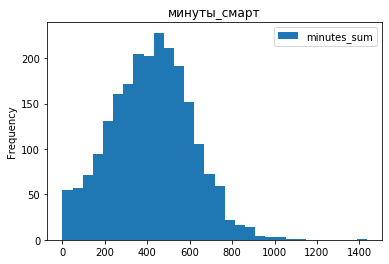

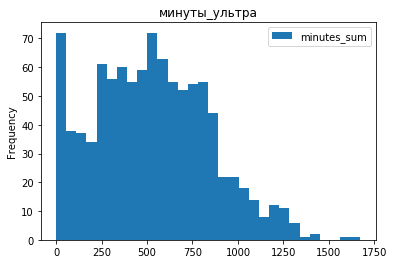

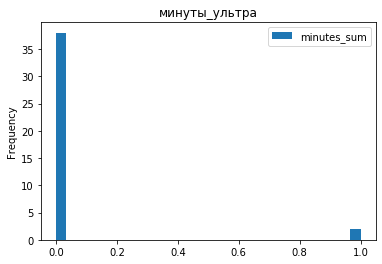

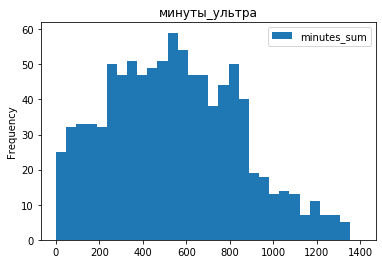

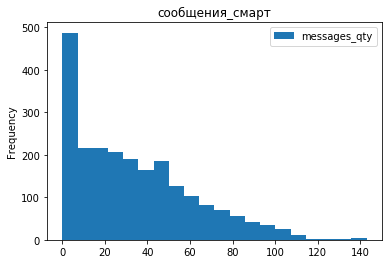

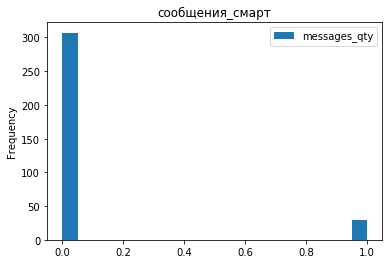

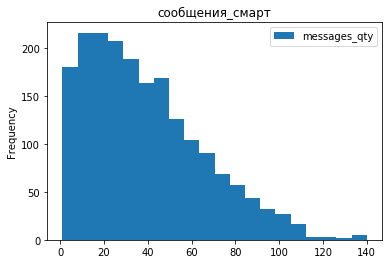

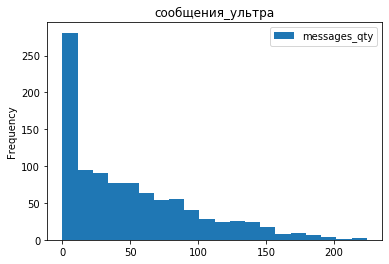

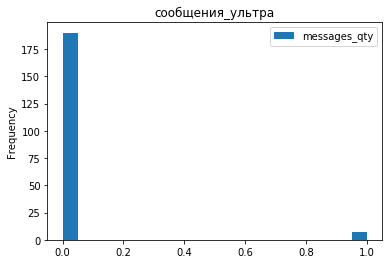

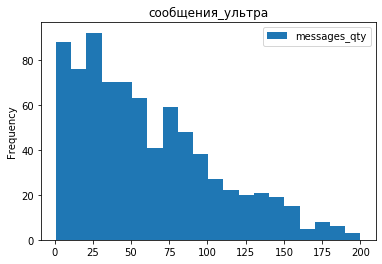

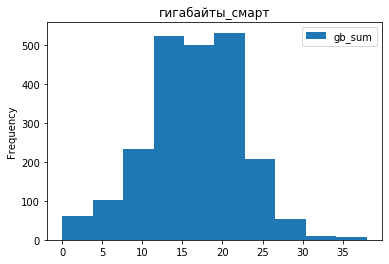

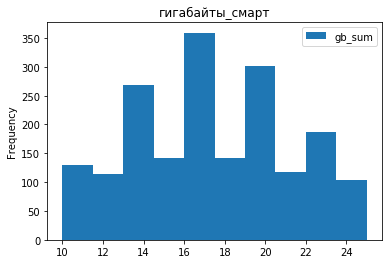

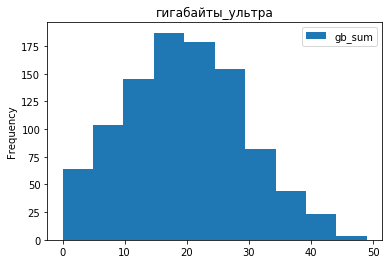

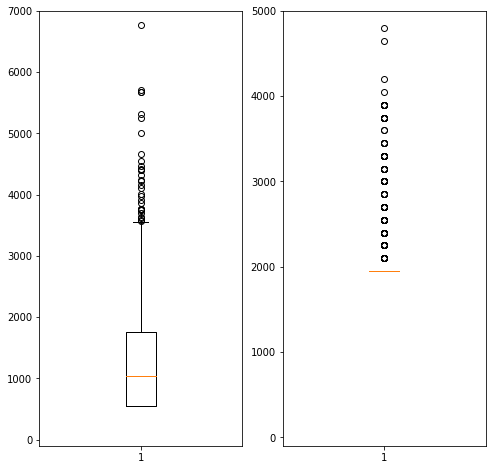

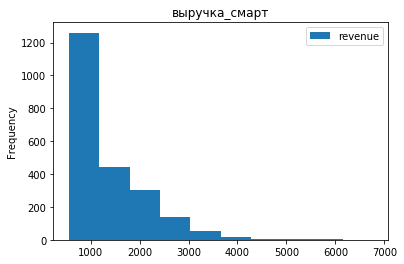

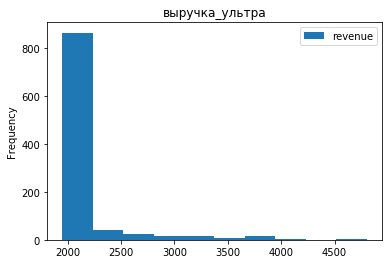

In [6]:
#разделяем общую выборку по тарифам
df_smart = df_general.query('tariff_name == "smart"')
df_ultra = df_general.query('tariff_name == "ultra"')
print(df_smart.info())
print(df_ultra.info())
print('Описание клиентов с тарифом Смарт:')
print()
#вызываем описание данных
print(df_smart[['minutes_sum', 'messages_qty', 'gb_sum', 'revenue']].describe())
print()
# description уже содержит данные о стандартном отклонении (std), но задание также требует расчет дисперсии
print('Расчет дисперсии по показателям Смарт:')
variance = np.var(df_smart[['minutes_sum', 'messages_qty', 'gb_sum', 'revenue']])
print(variance)
print()
print('Расчет стандартного отклонения по показателям Смарт:')
print(np.sqrt(variance))

print()
print('Описание клиентов с тарифом Ультра:')
print()
print(df_ultra[['minutes_sum', 'messages_qty', 'gb_sum', 'revenue']].describe())
print()
print('Расчет дисперсии по показателям Ультра:')
variance = np.var(df_ultra[['minutes_sum', 'messages_qty', 'gb_sum', 'revenue']])
print(variance)
print()
print('Расчет стандартного отклонения по показателям Ультра:')
print(np.sqrt(variance))


#построение гистограмм частот для показателей
df_smart.plot(kind='hist', y='minutes_sum', bins = 30,  title = 'минуты_смарт')
df_ultra.plot(kind='hist', y='minutes_sum',bins = 30, title = 'минуты_ультра')
df_ultra.plot(kind='hist', y='minutes_sum', bins = 30, range = (0, 1), title = 'минуты_ультра')
df_ultra.plot(kind='hist', y='minutes_sum', bins = 30, range = (1, 1400), title = 'минуты_ультра')
df_smart.plot(kind='hist', y='messages_qty', bins = 20, title = 'сообщения_смарт')
df_smart.plot(kind='hist', y='messages_qty', bins = 20,  range = (0, 1), title = 'сообщения_смарт')
df_smart.plot(kind='hist', y='messages_qty', bins = 20,  range = (1, 140), title = 'сообщения_смарт')
df_ultra.plot(kind='hist', y='messages_qty', bins = 20, title = 'сообщения_ультра')
df_ultra.plot(kind='hist', y='messages_qty', bins = 20, range = (0, 1), title = 'сообщения_ультра')
df_ultra.plot(kind='hist', y='messages_qty', bins = 20, range = (1, 200), title = 'сообщения_ультра')
df_smart.plot(kind='hist', y='gb_sum', bins = 10, title = 'гигабайты_смарт')
df_smart.plot(kind='hist', y='gb_sum', bins = 10, range = (10, 25), title = 'гигабайты_смарт')
df_ultra.plot(kind='hist', y='gb_sum', bins = 10, title = 'гигабайты_ультра')
# построим диаграмму размаха для дохода
fig, axes = plt.subplots(1,2, figsize = (8,8))
axes[0].boxplot(df_smart['revenue'])
axes[1].boxplot(df_ultra['revenue'])

plt.sca(axes[0])
plt.ylim(-100, 7000)
plt.sca(axes[1])
plt.ylim(-100, 5000)

df_smart.plot(kind='hist', y='revenue', bins = 10, title = 'выручка_смарт')
df_ultra.plot(kind='hist', y='revenue', bins = 10, title = 'выручка_ультра')
df_smart['revenue'].value_counts()

#### Вывод по сравнению тарифов
1. По минутам разговора: 
    - Тариф Смарт:
        - чаще всего тратят 300 - 500 минут в месяц
        - среднее - 417 минут
        - медиана - 422 минуты
        - стандартное отклонение - 190
    - Тариф Ультра:
        - высокая частота клиентов с 0 минут, т.е. пропущенные вызовы и не использующие услугу
        - чаще всего тратят 250 - 900 минут в месяц
        - среднее - 526
        - медиана - 518
        - стандартное отклонение - 317


 - В среднем клиенты тарифа Ультра разговаривают дольше, даже несмотря на бОльшее кол-во клиентов с 0 минут в месяц + частота тех, кто разговаривает больше 500 минут > чем в тарифе Смарт


2. По сообщениям:
     - Тариф Смарт:
        - значительное кол-во клиентов с 0 сообщений
        - наибольшая частота в диапазоне до 50 сообщений в месяц, затем частота падает
        - среднее - 33
        - медиана - 28
        - стандартное отклонение - 28
     - Тариф Ультра:
         - значительное кол-во клиентов с 0 сообщений
         - наибольшая частота в диапазоне до 50 сообщений в месяц, но есть всплеск частоты в районе 75 сообщений, затем частота падает
         - среднее - 49
         - медиана - 38
         - стандартное отклонение - 47


 - В среднем клиенты тарифа Ультра пишут больше + частота тех, кто пишет от 75 сообщений > чем в тарифе Смарт     
 

3. По гигабайтам:
    - Тариф Смарт:
        - бОльшее кол-во клиентов сконцентрировано в диапазоне 13 - 20 гб
        - среднее - 16 
        - медиана - 17 
        - стандартное отклонение - 6
    - Тариф Ультра:
        - бОльшее кол-во клиентов сконцентрировано в диапазоне 15 - 25 гб
        - среднее - 20
        - медиана - 19
        - стандартное отклонение - 10

4. По выручке:
    - Тариф Смарт:
        - 25% клиентов платят только абонентскую плату
        - среднее - 1295 
        - медиана - 1038 
        - стандартное отклонение - 820
    - Тариф Ультра:
        - 86% клиентов платят только абонентскую плату
        - среднее - 2071
        - медиана - 1950
        - стандартное отклонение - 378

 **Вывод:**
 - Поскольку медиана и среднее по минутам, сообщениям и гб. достаточно близки, критичного кол-ва выбросов в выборках нет
 - По тарифу смарт есть расхождение между средним и медианой по выручке, это связано с большим разбросом данных и более длинным "хвостом" распределения.
 - По тарифу ультра подавляющее большинство клиентов не выходит за лимиты пакета и вносят только абонентскую плату
 - Стандартное отклонение по минутам, сообщениям и гб. в выборке Ультра выше, чем в тарифе Смарт, т.е. разборс значений больше, но и выборка в два раза меньше.
 - В среднем клиенты в выборке тарифа Ультра разговаривают, пишут и тратят гигабайт больше, чем в выборке тарифа Смарт и платят также больше.
 - Клиентам тарифа Смарт требуется до 500 минут разговора, 50 сообщений и 20 гб интернета в месяц
 - Клиентам тарифа Ультра требуется до 900 минут разговора, 75 сообщений и 25 гб интернета в месяц

### Сравнение Москва vs Регионы по выручке

count     611.000000
mean     1550.805237
std       752.451347
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64
count    2603.000000
mean     1528.316942
std       810.411374
min       550.000000
25%       750.000000
50%      1587.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64
Микс тарифов в Москве:
smart    386
ultra    225
Name: tariff_name, dtype: int64
Микс тарифов в Регионах:
smart    1843
ultra     760
Name: tariff_name, dtype: int64
Москва_Смарт: count     386.000000
mean     1245.056995
std       755.005483
min       550.000000
25%       550.000000
50%      1011.500000
75%      1681.750000
max      5321.000000
Name: revenue, dtype: float64
Регионы_Смарт: count    1843.000000
mean     1305.023874
std       833.900506
min       550.000000
25%       553.000000
50%      1040.000000
75%      1765.000000
max      6770.000000
Name: revenue, dtype: float64
Москва_Ультра

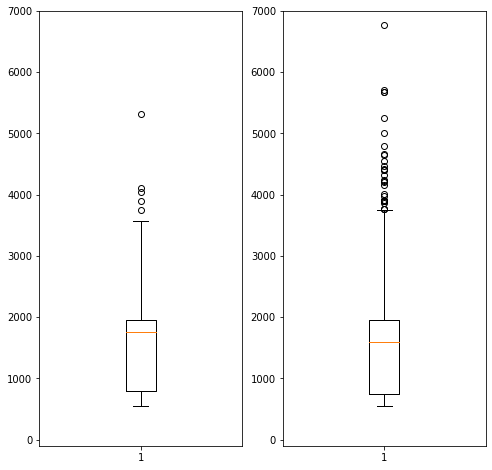

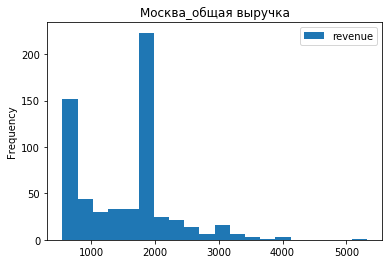

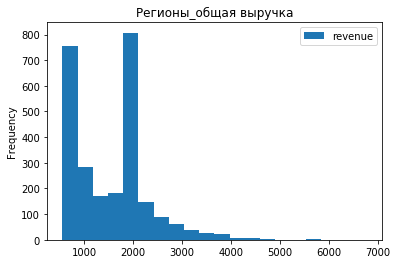

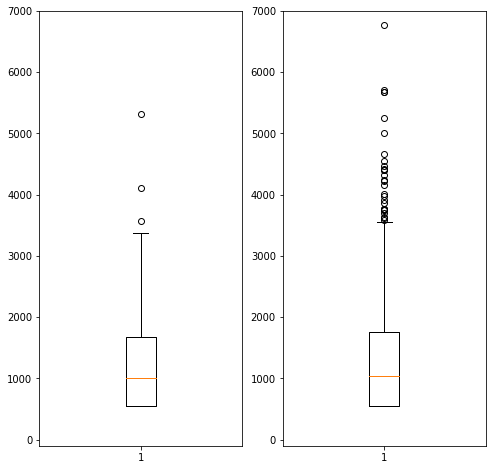

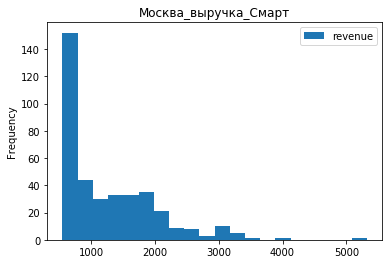

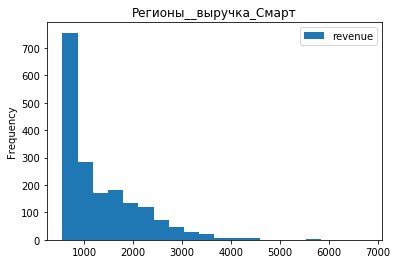

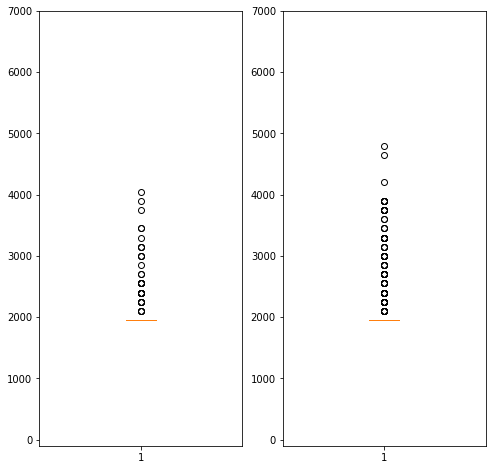

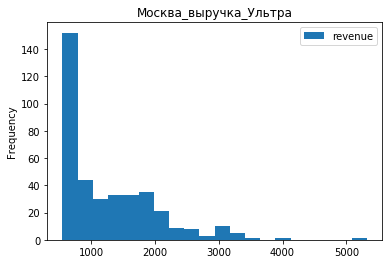

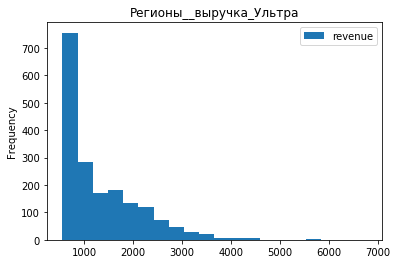

In [7]:
#разделяем общую выборку на Москву и регионы
df_moscow = df_general.query('city == "москва"')
df_regions = df_general.query('city != "москва"')
print(df_moscow['revenue'].describe())
print(df_regions['revenue'].describe())

print('Микс тарифов в Москве:')
print(df_moscow['tariff_name'].value_counts())
print('Микс тарифов в Регионах:')
print(df_regions['tariff_name'].value_counts())

# разделяем выборки по тарифам
df_moscow_smart = df_moscow.query('tariff_name == "smart"')
df_regions_smart = df_regions.query('tariff_name == "smart"')

df_moscow_ultra = df_moscow.query('tariff_name == "ultra"')
df_regions_ultra = df_regions.query('tariff_name == "ultra"')

print("Москва_Смарт:", df_moscow_smart['revenue'].describe())
print("Регионы_Смарт:", df_regions_smart['revenue'].describe())

print("Москва_Ультра:", df_moscow_ultra['revenue'].describe())
print("Регионы_Ультра:", df_regions_ultra['revenue'].describe())


# построим диаграмму размаха для дохода общего по Москве и регионам
fig, axes = plt.subplots(1,2,  figsize = (8,8))
axes[0].boxplot(df_moscow['revenue'])
axes[1].boxplot(df_regions['revenue'])

plt.sca(axes[0])
plt.ylim(-100, 7000)
plt.sca(axes[1])
plt.ylim(-100, 7000)

df_moscow.plot(kind='hist', y='revenue', bins = 20, title = 'Москва_общая выручка')
df_regions.plot(kind='hist', y='revenue', bins = 20, title = 'Регионы_общая выручка')

# построим диаграмму размаха для дохода по тарифу Смарт по Москве и регионам
fig, axes = plt.subplots(1,2,  figsize = (8,8))
axes[0].boxplot(df_moscow_smart['revenue'])
axes[1].boxplot(df_regions_smart['revenue'])

plt.sca(axes[0])
plt.ylim(-100, 7000)
plt.sca(axes[1])
plt.ylim(-100, 7000)

df_moscow_smart.plot(kind='hist', y='revenue', bins = 20, title = 'Москва_выручка_Смарт')
df_regions_smart.plot(kind='hist', y='revenue', bins = 20, title = 'Регионы__выручка_Смарт')

# построим диаграмму размаха для дохода по тарифу Ультра по Москве и регионам
fig, axes = plt.subplots(1,2,  figsize = (8,8))
axes[0].boxplot(df_moscow_ultra['revenue'])
axes[1].boxplot(df_regions_ultra['revenue'])

plt.sca(axes[0])
plt.ylim(-100, 7000)
plt.sca(axes[1])
plt.ylim(-100, 7000)

df_moscow_smart.plot(kind='hist', y='revenue', bins = 20, title = 'Москва_выручка_Ультра')
df_regions_smart.plot(kind='hist', y='revenue', bins = 20, title = 'Регионы__выручка_Ультра')

#### Вывод

1. По выручке общие: 
    - Москва:
        - пики частотности совпадают с абонентскими платами
        - среднее - 1550
        - медиана - 1750 
        - стандартное отклонение - 752
        
    - Регионы:
        - пики частотности совпадают с абонентскими платами
        - среднее - 1528
        - медиана - 1587
        - стандартное отклонение - 810

2. По выручке Смарт: 
    - Москва:
        - пики частотности совпадают с абонентской платой
        - среднее - 1245
        - медиана - 1011
        - стандартное отклонение - 755
    - Регионы:
        - пики частотности совпадают с тарифами
        - среднее - 1305
        - медиана - 1040
        - стандартное отклонение - 833
         
3. По выручке Ультра: 
    - Москва:
        - пики частотности совпадает с абонентской платой
        - среднее - 2075
        - медиана - 1950
        - стандартное отклонение - 353
    - Регионы:
        - пики частотности совпадают с тарифами
        - среднее - 2069
        - медиана - 1950
        - стандартное отклонение - 386              

**Вывод:**
 - Различия между Москвой и регионами по тарифу Смарт - менее 100 рублей, медианы почти совпадают, по тарифу Ультра почти полное совпадение.
 - Если брать общий срез данных по Москве и Регионам без деления по тарифам, то в Москве средние показатели чуть выше за счет 40% доли тарифа Ультра, в регионах она составляет 29%

### Формулировка и проверка гипотез

#### Гипотеза о разных средних выручках по тарифам
Имеем две генеральные совокупности по тарифу Смарт и Ультра. Нам необходимо понять, случайны ли установленные различия по средней выручке в их выборках. 

**Нулевая гипотеза** - различий в генеральной совокупности нет

**Альтернативная гипотеза** - средняя выручка по тарифу Ультра действительно больше, чем у тарифа Смарт

In [8]:
#установим уровень статистической значимости
alpha = .01
#проверим гипотезу о равенстве среднего двух генеральных совокупностей, т.к. дисперсия и стандартное отклонение у выборок различается, поставим False в параметр equal_var
results_tariffs = st.ttest_ind(df_moscow['revenue'], df_ultra['revenue'], equal_var = False)
print('p-значение:', results_tariffs.pvalue)
if results_tariffs.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2182009829599834e-49
Отвергаем нулевую гипотезу


##### Вывод
Проверка гипотезы показала, что вероятность получить выявленные в выборках различия случайным образом ничтожно мала, ее можно отвергнуть и считать, что различия между тарифами в генеральной совокупности действительно есть.

- Выбран уровень статистической значимости в 1%, т.к. уровень в 5% допускает, что в 1 из 20 исследовании нулевую гипотезу можно отвергнуть по ошибке.
- параметр equal_var = False, т.к. дисперсии в выборках различаются

#### Гипотеза о разных средних выручках у Москвы и регионов

Имеем две генеральные совокупности по выручка клиентов в Москве и в регионах. Нам необходимо понять, случайны ли установленные различия по средней выручке в их выборках.

**Нулевая гипотеза** - различий в генеральной совокупности нет

**Альтернативная гипотеза** - средняя выручка по в Москве больше, чем в регионах

In [9]:
#установим уровень статистической значимости
alpha = .01
#проверим гипотезу о равенстве среднего двух генеральных совокупностей, т.к. дисперсия и стандартное отклонение у выборок различается, поставим False в параметр equal_var
results_city = st.ttest_ind(df_moscow['revenue'], df_regions['revenue'], equal_var = False)
print('p-значение:', results_city.pvalue)
if results_city.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


##### Вывод
Проверка гипотезы показала, что вероятность получить выявленные в выборках различия случайным образом > 50%, отвергнуть нулевую гипотезу не получилось. Таким образом, принять гипотезу, что выручка в Москве больше, чем в регионах мы не можем.

## Общий вывод

В ходе исследования было выявлено:

1.  **различие в средней выручке между тарифами**. У тарифа Ультра она больше. В результате проверки гипотезы установлено, что вероятность получить такое различие случайным образом маловероятно, т.е. можно допустить, что это **различие существует и в генеральной совокупности**. Таким образом, рекламный бюджет целесообразно тратить с фокусом на тариф Ультра.


2. **различия между средней выручкой по Москве и регионам в выборках небольшое**. В результате проверки гипотезы установлено, что вероятность получить такое различие случайным образом > 50%, т.е. можно допустить, что **нет различия между Москвой и регионами в генеральной совокупности**.

В результате анализа распределений выборок:
1. Клиентам тарифа Смарт требуется до 500 минут разговора, 50 сообщений и 20 гб интернета в месяц
2. Клиентам тарифа Ультра требуется до 900 минут разговора, 75 сообщений и 25 гб интернета в месяц

Таким образом, ответы на основной и дополнительные вопросы заказчика найдены. Цель исследования выполнена.

**Дополнительная информация:**
В выборке найдено много звонков с нулевой длительностью. Это могут быть пропущенные звонки. Необходимо это учитывать при анализе реального кол-ва звонков в будушем, т.к. результаты могут быть искажены.